In [11]:
# RESUME SCREENING

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import os
os.chdir("drive/MyDrive/Resume")
!pwd

/content/drive/MyDrive/Resume


In [14]:
import pandas as pd
import numpy as np

In [15]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [17]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [18]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [19]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [21]:
df.isnull()

,Category,Resume
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
957,False,False
958,False,False
959,False,False
960,False,False


In [22]:
print(df.isnull().sum())

Category    0
Resume      0
dtype: int64


In [23]:
df.shape

(962, 2)

In [24]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [25]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [26]:
x_axis = df['Category'].value_counts().index.to_list()
y_axis = df['Category'].value_counts().to_list()

In [27]:
x_axis

['Java Developer',
 'Testing',
 'DevOps Engineer',
 'Python Developer',
 'Web Designing',
 'HR',
 'Hadoop',
 'Blockchain',
 'ETL Developer',
 'Operations Manager',
 'Data Science',
 'Sales',
 'Mechanical Engineer',
 'Arts',
 'Database',
 'Electrical Engineering',
 'Health and fitness',
 'PMO',
 'Business Analyst',
 'DotNet Developer',
 'Automation Testing',
 'Network Security Engineer',
 'SAP Developer',
 'Civil Engineer',
 'Advocate']

In [28]:
y_axis

[84,
 70,
 55,
 48,
 45,
 44,
 42,
 40,
 40,
 40,
 40,
 40,
 40,
 36,
 33,
 30,
 30,
 30,
 28,
 28,
 26,
 25,
 24,
 24,
 20]

<ipython-input-29-300d32508d67>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Category', data= df,palette = 'mako')


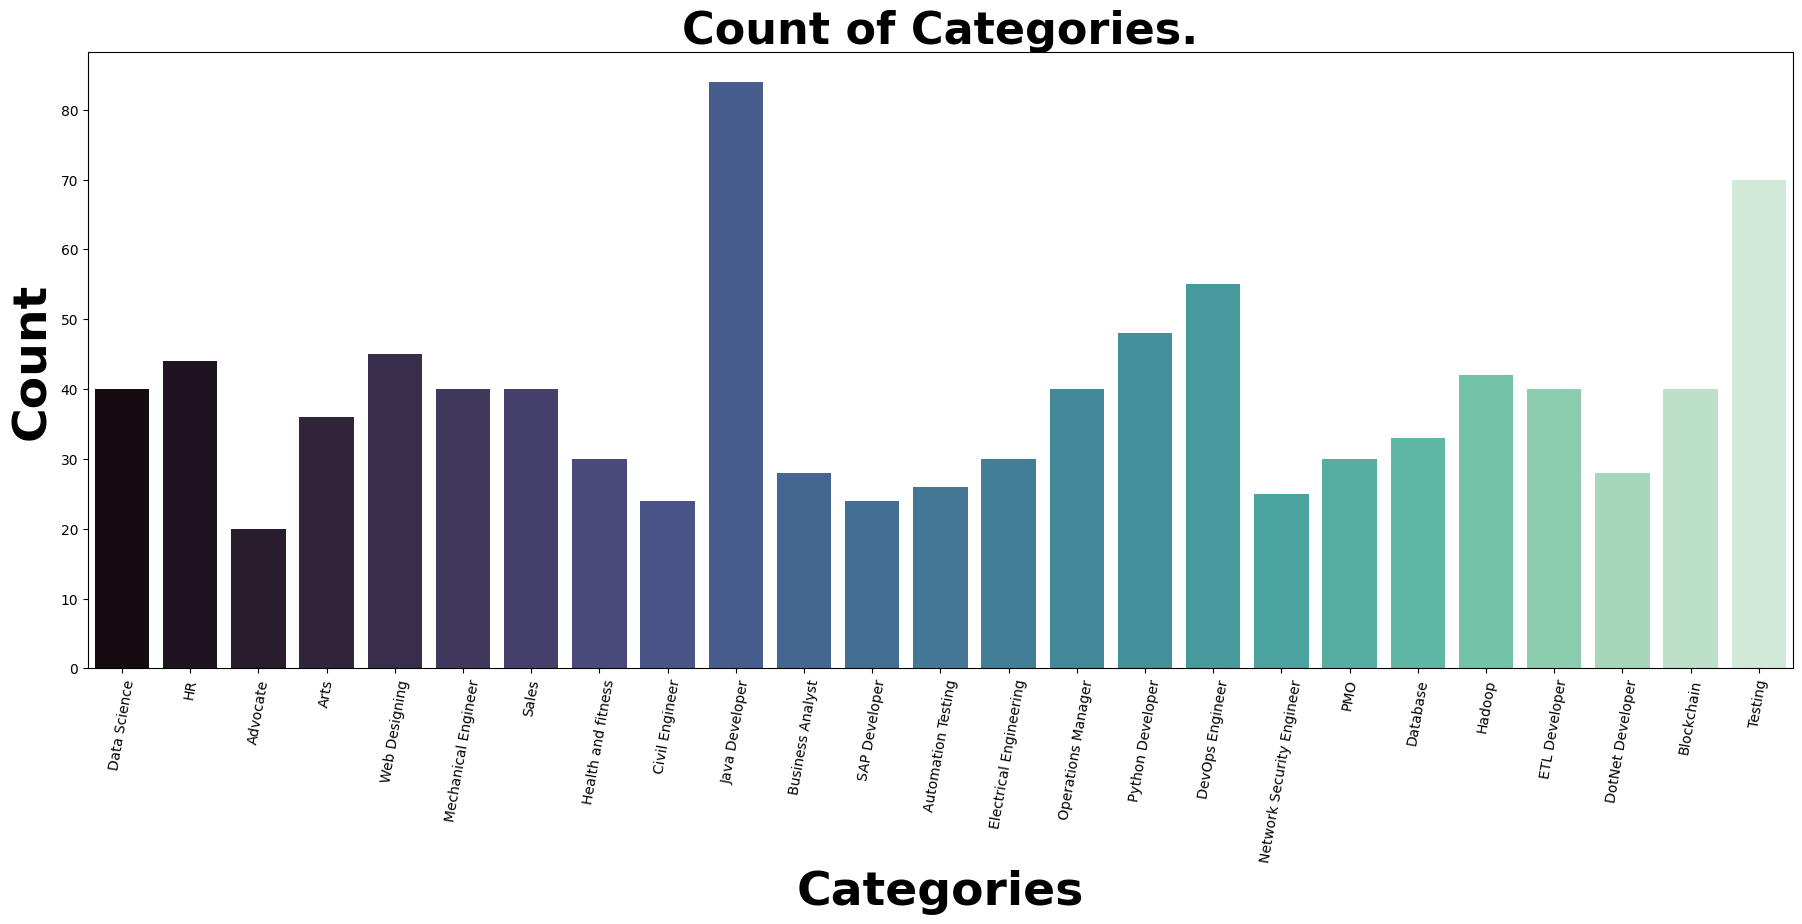

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22,8))
ax = sns.countplot(x = 'Category', data= df,palette = 'mako')
ax.set_title("Count of Categories.",fontweight = 'bold',size=32)
plt.xticks(rotation=80)
ax.set_ylabel('Count',fontweight='bold',size=34)
ax.set_xlabel("Categories",fontweight = 'bold',size=34)
plt.show()

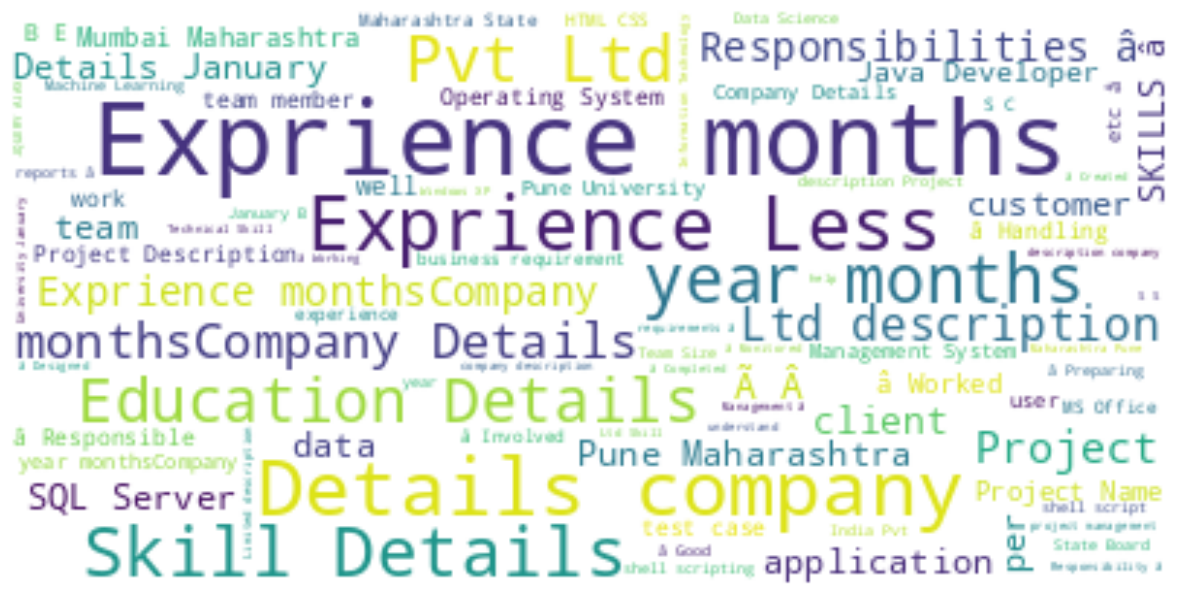

In [30]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in df.Resume)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(df)):
  review = re.sub('[^a-zA-Z]', ' ', df['Resume'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [32]:
corpus[1]

'educ detail may may b e uit rgpv data scientist data scientist matelab skill detail python exprienc less year month statsmodel exprienc month aw exprienc less year month machin learn exprienc less year month sklearn exprienc less year month scipi exprienc less year month kera exprienc less year monthscompani detail compani matelab descript ml platform busi profession dummi enthusiast koramangala th block achiev task behind sukh sagar bengaluru india develop deploy auto preprocess step machin learn mainli miss valu treatment outlier detect encod scale featur select dimension reduct deploy autom classif regress model linkedin com aditya rathor b b reasearch deploy time seri forecast model arima sarimax holt winter prophet work meta featur extract problem github com rathorolog implement state art research paper outlier detect mix attribut compani matelab descript'

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = df['Category'].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
#MultinomialNB

In [35]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [37]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
classifier.fit(X1_train, y1_train)
pred = classifier.predict(X1_test)
pred = classifier.predict(X1_test)

In [39]:
score = accuracy_score(y1_test, pred)
score

0.9875518672199171